## Table of Contents

1. [Module Import](#module-import)
2. [Synthetic Data](#synthetic-data)

***

## Module Import <a class="anchor" id="module-import"></a>

In [5]:
%matplotlib inline

#import libraries we're going to need
import math
import numpy as np
import lagrangiandataprocessing as ldp
import taylorgreenvortex as tgv
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

***

## Synthetic Data <a class="anchor" id="synthetic-data"></a>

### Parameter definition

Here we define some parameters that will be used in the synthetic data generation.

In [6]:
L = 1 # characteristic length scale, m
rho = 1000 # density, kg/m3
mu = 0.001 # viscosity, Pa*s
V0 = 1 # characteristic velocity, m/s

N = 20000 # number of data points

domain_size = 6 # size of domain in multiples of the charactreristic length

Next, we use the numpy random function and taylor green vortex module to create the synthetic data.
With a lagrangian velocimetry method, we would be able to measure the velocity and acceleration of the particles.

In [7]:
X = L*(domain_size*np.random.rand(N,3)-domain_size/2)

U = tgv.velocity(X,L,V0)
DUDt = tgv.acceleration(X,L,V0,rho,mu)

pTrue = tgv.pressure(X,L,V0,rho)


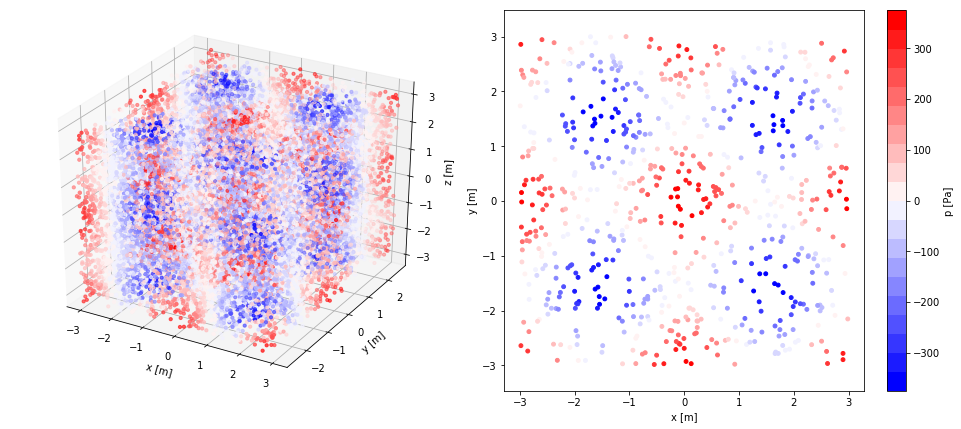

In [18]:
# let's visualize the data first in 3D and on a 2D slice on the z=0 plane

pMaxAbs = max(np.abs(np.max(pTrue)),np.abs(np.min(pTrue)))

pMax = pMaxAbs
pMin = -pMaxAbs

zThresh = 0.1

norm = mpl.colors.Normalize(vmin=pMin,vmax=pMax)
cmap=plt.cm.get_cmap('bwr', 20)

fig = plt.figure(figsize=(14,7))

fig.canvas.toolbar_visible = True
fig.canvas.header_visible = True

ax = fig.add_subplot(121, projection='3d')

ax.scatter(X[:,0],X[:,1],X[:,2],s=10,c=pTrue,cmap=cmap,vmin=pMin, vmax=pMax);

ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')


ax2 = fig.add_subplot(122)

X_zPlane = X[np.abs(X[:,2])<zThresh,:]
pTrue_zPlane = pTrue[np.abs(X[:,2])<zThresh]

ax2.scatter(X_zPlane[:,0],X_zPlane[:,1],s=15,c=pTrue_zPlane,cmap=cmap,vmin=pMin,vmax=pMax)


ax2.set_xlabel('x [m]')
ax2.set_ylabel('y [m]')


ax.axis('equal')
ax2.axis('equal')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

sm.set_array([])

plt.colorbar(sm,label='p [Pa]')

plt.subplots_adjust(left=0.01,right=0.95,wspace=0.1)

